<font size=5><b>학습

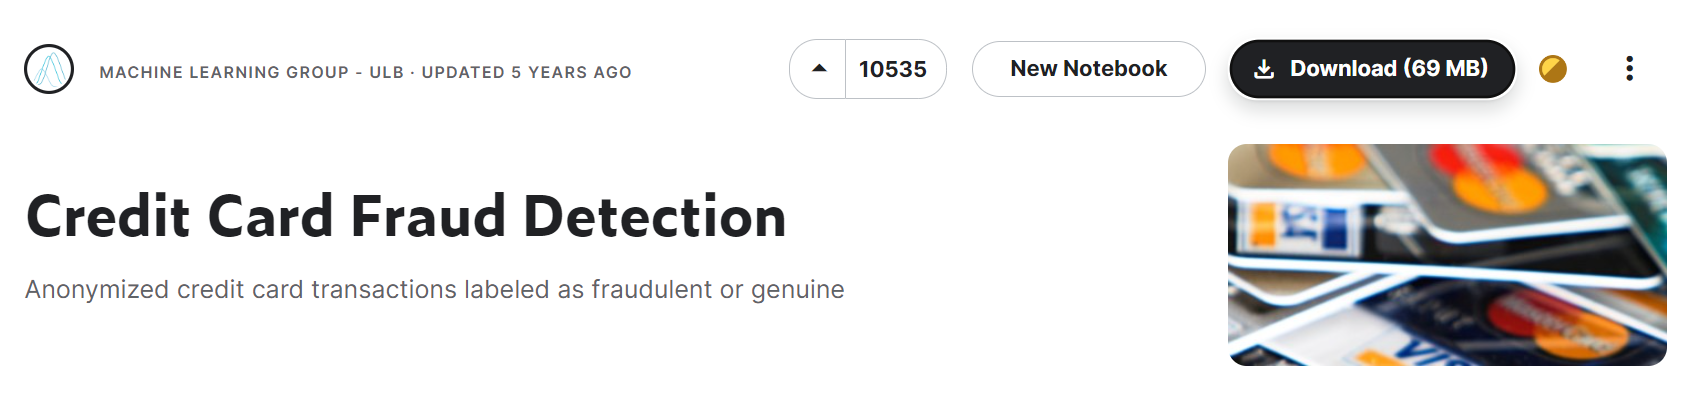
* ref : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------ 훈련데이터
from sklearn.datasets import load_iris
# --------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
# -------------------------------------------------------------------------- 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# -------------------------------------------------------------------------- 인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# -------------------------------------------------------------------------- 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# -------------------------------------------------------------------------- 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
# -------------------------------------------------------------------------- 교차검증
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------------------------------

import warnings
warnings.filterwarnings(action="ignore")

#----------------------------------- 차트 : seaborn 스타일 적용
sns.set()

In [2]:
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 차트 관련 속성 (차트크기 ) -----------
# plt.rcParams['figure.figsize'] = (4, 2)
# plt.rcParams['font.size'] = 7

# Data Load
* df.info()
* df.shape
* df.head()

In [3]:
df = pd.read_csv("./creditcard.csv")
# df.columns = df.columns.str.lower()
print(df.shape)
df.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA
* 이전 파일 참조

# 전치리 & 가공

In [5]:
orig_df =df.copy()

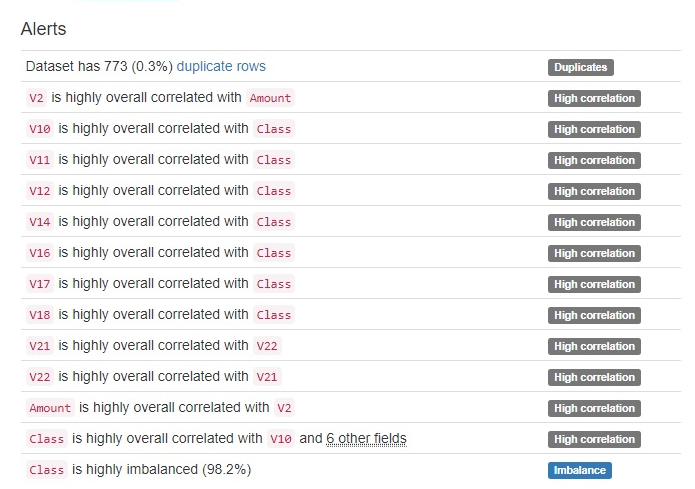

## 중복제거
* 773 rows (0.3%)

```python
DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False)
```

In [6]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)
print(284807 - 283726,   (1081/283726) * 100)

(284807, 31)
(283726, 31)
1081 0.38100138866371075


## 상관분석
* 상관분석 설명 잘됨 : http://www.6025.co.kr/bbs/board.php?bo_table=cust_in&wr_id=13
<pre>
Class   :  V14  'V17' (-)      'V11' 'V4' (+) 
Amount 	:  V2, V20 	 
Time 	:  V3 	

## 1차 점수

In [7]:
# help(train_test_split)
# help(DecisionTreeClassifier)
# help(cross_val_score)
# help(StratifiedKFold)

In [8]:
#----------------------------------- 원본점수
df = orig_df.copy()

y = df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1212, stratify=y)
model = DecisionTreeClassifier(random_state=1212)
model.fit(X_train, y_train)
pred  = model.predict(X_test)
proba = model.predict_proba(X_test)
# accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, proba[:,1])

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1212)
score_arr = cross_val_score(model, X, y, scoring="f1", cv=skfold, n_jobs=-1)

print(f"f1:{f1:.4f} f1(cv):{score_arr.mean():.4f}")
print(confusion_matrix(y_test, pred) )


f1:0.7905 f1(cv):0.7736
[[56835    29]
 [   15    83]]


# 공통함수

In [9]:
def my_score(df) : 
    y = df['Class']
    X = df.drop('Class', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1212, stratify=y)
    model = DecisionTreeClassifier(random_state=1212)
    model.fit(X_train, y_train)
    pred  = model.predict(X_test)
    proba = model.predict_proba(X_test)
    # accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, proba[:,1])
    
    skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1212)
    score_arr = cross_val_score(model, X, y, scoring="f1", cv=skfold, n_jobs=-1)

    print(f"f1:{f1:.4f} f1(cv):{score_arr.mean():.4f}")
    print(confusion_matrix(y_test, pred) )

## 아웃라이어(1)
* 타겟에 영향을 주는 주요 피쳐  'V14'  'V17' (-)
* 그외
    * V2<-60  class=0  
    * V2<-100  class=0  
    * V7>100  class=0  
    * V4<-40  class=0  =0  

In [10]:
drop_idx_list = []
idx = df[df['Amount'] > 15000].index
print( idx )
drop_idx_list.extend(idx)


Int64Index([58465, 151296, 274771], dtype='int64')


In [11]:
idx = df[(df['Class'] == 0) &  ((df['V14'] > 10) | (df['V14'] < -15)) ] .index
print( idx )
drop_idx_list.extend(idx)

Int64Index([65423, 118764], dtype='int64')


In [12]:
len(drop_idx_list), drop_idx_list[:5]

(5, [58465, 151296, 274771, 65423, 118764])

In [13]:
print(df.shape)
df.drop(drop_idx_list, axis=0, inplace=True)
print(df.shape)

(284807, 31)
(284802, 31)


In [14]:
my_score(df)

f1:0.7196 f1(cv):0.7366
[[56824    39]
 [   21    77]]


<pre>
1차(원본) 
f1:0.7905 f1(cv):0.7736
[[56835    29]
 [   15    83]]

# 아웃라이어(2)
* https://www.kaggle.com/code/naveengowda16/anomaly-detection-credit-card-fraud-analysis
* Define the outlier detection methods
* 


## Outlier and Anomaly Detection
* [adtk](https://github.com/arundo/adtk) ![](https://img.shields.io/github/stars/arundo/adtk.svg?style=social)  - A Python toolkit for rule-based/unsupervised anomaly detection in time series.
* [Alibi-Detect](https://github.com/SeldonIO/alibi-detect) ![](https://img.shields.io/github/stars/seldonio/alibi-detect.svg?style=social) - Algorithms for outlier and adversarial instance detection, concept drift and metrics.
* [dBoost](https://github.com/cpitclaudel/dBoost) ![](https://img.shields.io/github/stars/cpitclaudel/dBoost.svg?style=social) - Outlier detection in heterogeneous datasets using automatic tuple expansion. [Paper](https://dspace.mit.edu/bitstream/handle/1721.1/101150/MIT-CSAIL-TR-2016-002.pdf?sequence=1).
* [Deequ](https://github.com/awslabs/deequ) ![](https://img.shields.io/github/stars/awslabs/deequ.svg?style=social) - A library built on top of Apache Spark for defining "unit tests for data", which measure data quality in large datasets.
* [Deep Anomaly Detection with Outlier Exposure](https://github.com/hendrycks/outlier-exposure) ![](https://img.shields.io/github/stars/hendrycks/outlier-exposure.svg?style=social) - Outlier Exposure (OE) is a method for improving anomaly detection performance in deep learning models. [Paper](https://arxiv.org/pdf/1812.04606.pdf)
* [Open Distro Anomaly Detection](https://github.com/opendistro-for-elasticsearch/anomaly-detection) ![](https://img.shields.io/github/stars/opendistro-for-elasticsearch/anomaly-detection.svg?style=social) - The Open Distro (Amazon) for the Elasticsearch Anomaly Detection plugin.
* [PyOD](https://github.com/yzhao062/pyod) ![](https://img.shields.io/github/stars/yzhao062/pyod.svg?style=social) - A Python Toolbox for Scalable Outlier Detection (Anomaly Detection).
* [SUOD (Scalable Unsupervised Outlier Detection)](https://github.com/yzhao062/SUOD) ![](https://img.shields.io/github/stars/yzhao062/SUOD.svg?style=social) - An Acceleration System for Large-scale Outlier Detection (Anomaly Detection)
* [Tensorflow Data Validation (TFDV)](https://github.com/tensorflow/data-validation) ![](https://img.shields.io/github/stars/tensorflow/data-validation.svg?style=social) - Library for exploring and validating machine learning data.


In [ ]:
# classifiers = {
#     "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
#                                        contamination=outlier_fraction,random_state=state, verbose=0),
#     "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
#                                               leaf_size=30, metric='minkowski',
#                                               p=2, metric_params=None, contamination=outlier_fraction),
#     "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
#                                          max_iter=-1, random_state=state)
   
# }

In [ ]:
# #Fit the model

# n_outliers = len(Fraud)
# for i, (clf_name,clf) in enumerate(classifiers.items()):
#     #Fit the data and tag outliers
#     if clf_name == "Local Outlier Factor":
#         y_pred = clf.fit_predict(X)
#         scores_prediction = clf.negative_outlier_factor_
#     elif clf_name == "Support Vector Machine":
#         clf.fit(X)
#         y_pred = clf.predict(X)
#     else:    
#         clf.fit(X)
#         scores_prediction = clf.decision_function(X)
#         y_pred = clf.predict(X)
#     #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
#     y_pred[y_pred == 1] = 0
#     y_pred[y_pred == -1] = 1
#     n_errors = (y_pred != Y).sum()
#     # Run Classification Metrics
#     print("{}: {}".format(clf_name,n_errors))
#     print("Accuracy Score :")
#     print(accuracy_score(Y,y_pred))
#     print("Classification Report :")
#     print(classification_report(Y,y_pred))

<pre>예시 결과
    
Isolation Forest: 69
Accuracy Score :
0.9975773322565921
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28434
           1       0.27      0.28      0.27        47

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.63      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 93
Accuracy Score :
0.9967346652154068
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28434
           1       0.02      0.02      0.02        47

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

/opt/conda/lib/python3.6/site-packages/sklearn/svm/classes.py:1177: DeprecationWarning:

The random_state parameter is deprecated and will be removed in version 0.22.

Support Vector Machine: 8411
Accuracy Score :
0.7046803131912504
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     28434
           1       0.00      0.34      0.00        47

   micro avg       0.70      0.70      0.70     28481
   macro avg       0.50      0.52      0.42     28481
weighted avg       1.00      0.70      0.83     28481

## 스케일링
* 연속형 변수 : Amount, Time
* 로그변환 : np.log1p()
* 스케일링 : sklearn.preprocessing : MinMaxScaler(), StandardScaler(), RobustScaler()
* 왜도 첨도

In [15]:
# 컬럼2 = np.log1p(컬럼)

# 불균형 데이터 처리

# 모델 적용
* random_state = 1212
* test_size = 0.2
* 모델선택 : pycaret
* 단일모델 : cross_val_socre()
* 하이퍼파라미터 튜닝 : GridSearchCV(), optuna()
* 평가점수 : f1, accuracy

## pycaret
* 최적의 모델

## 단일모델 
* 교차검증 : cross_val_socre()
* 하이퍼파라미터 튜닝 : GridSearchCV(), optuna()
* 피쳐 중요도

## 앙상블 (모델s)
* 교차검증 : cross_val_socre()
* 하이퍼파라미터 튜닝 : GridSearchCV(), optuna()
* 피쳐 중요도